Hello everyone!!!

Today i am working on PCA (Principal component analysis).
If you like then please vote me!!

# Introduction 

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
             Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

# Steps to do it

* Step 1: Standardization
* Step 2: Covariance Matrix computation
* Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
* Step 4: Feature vector
* Step 5: Recast the data along the principal components axes

# For brief information please visit below link:

https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2

# Please check below plot for more information...
This is how actually it works.....


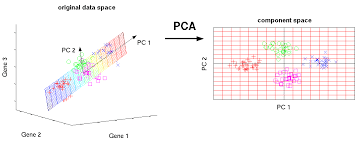

# Exercise

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
print(os.listdir("../input"))


In [ ]:
#Reading the dataset..
df=pd.read_csv("../input/wineQualityReds.csv")

In [ ]:
#Checking the starting "5" values.
df.head()

In [ ]:
#Checking if there is any existing null value or not
df.isnull().sum()

In [ ]:
#Checking the unique values from "quality column"
df["quality"].unique()

In [ ]:
#Count the unique values in "quality column"
df["quality"].value_counts()

In [ ]:
#Plot for quality
df["quality"].value_counts().plot.bar(color='Yellow')
plt.xlabel("Quality score")
plt.legend()

In [ ]:
#Checking the dimensions
df.shape

In [ ]:

#Separating dependent and independent variable.
X = df.iloc[:, 1:12].values
y = df.iloc[:, 12].values




In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [ ]:

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_



In [ ]:
print(explained_variance)

In [ ]:
#Fitting Logistic regression into dataset
from sklearn.linear_model import LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
print("The accuracy of  LogisticRegression is:",accuracy_score(y_test, lr_pred))

In [ ]:
print(lr_cm)

In [ ]:
#Fitting Randomforest into dataset
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
print("The accuracy of RandomForestClassifier is:",accuracy_score(rdf_pred,y_test))

In [ ]:
print(rdf_cm)

In [ ]:
#Fitting KNN into dataset
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
print("The accuracy of KNeighborsClassifier is:",accuracy_score(knn_pred,y_test))

In [ ]:
print(knn_cm)

In [ ]:
#Fitting Naive bayes into dataset
from sklearn.naive_bayes import GaussianNB



gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
print("The accuracy of naives bayes is:",accuracy_score(bayes_pred,y_test))

In [ ]:
print(bayes_cm)

# Conclusion

     Here my intension is to apply PCA on wine dataset ,i am not bother about the accuracy right now....However you can solve it by checking its correlation(using heatmap or df,corr()) between each variable and remove the variables which are less correlated to your dependent variable......For sure you will get good accuracy...
     